<a href="https://colab.research.google.com/github/Kaiziferr/feature_engineering/blob/main/feature_selection/01_mutual_Information_MI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import warnings

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.model_selection import train_test_split

#**Info**
---
@By: **Steven Bernal**

@Nickname: **Kaiziferr**

@Git: https://github.com/Kaiziferr

- The objective of this project is to demonstrate the Mutual Information (MI) process in classification and regression problems

# **Functions**

In [15]:
def generate_colors(paleta:str="Set1", n_colors:int=15)-> tuple:
  """color generator"""
  try:
    cmap = sns.color_palette(paleta, n_colors).as_hex()
    list_camp = ListedColormap(cmap)
    return cmap, list_camp
  except Exception as e:
    print(e)


def plot_bar(data:pd.DataFrame, paleta:list=None, figsize_x:int=8, figsize_y:int=5,
             fontsize:int=15, **kwards)->None:
  """Grafica un diagrama de barras con multiples caracteristicas"""
  try:
    paleta = paleta if paleta !=None else generate_colors()[0]
    v = kwards
    ejeX = v["ejeX"]

    fig, ax = plt.subplots(figsize = (figsize_x, figsize_y))
    fig.suptitle(f'Diagrama de barras {v["title"]}', fontsize=fontsize)

    if type(ejeX) == str:
      sns.countplot(x=ejeX, data=data, ax = ax, palette=paleta)
    else:
      ejeX = v['ejeX'][0]
      sns.countplot(x=ejeX, hue=v['ejeX'][1], data=data, ax=ax, palette=paleta)

    ax.set_ylabel(v['ejey'], size = 12)
    ax.set_xlabel(ejeX, size=fontsize-3)
    ax.set_xticklabels(ax.get_xticklabels(),fontsize = fontsize-3)
    for p in ax.patches:
      try:
        height = int(p.get_height())
        ax.text(p.get_x()+p.get_width()/2., height + 1,height, ha="center")
      except:
        pass

  except Exception as e:
    print(e)

def score_mi_plot(score, features):
  """Plotting MI score"""
  plt.hlines(y=features, xmin=0, xmax=score, color='skyblue')
  plt.plot(score, features, "o")
  plt.title("Mutual Information Scores", loc='left')
  plt.xlabel('Score')
  plt.ylabel('Feature Group')

# **Data Dictionary**
---
Data from a cryptocurrency mining network traffic dataset is used.


- `Name`: time window name.
- `Netflows`: number of netflows in the time window.
- `First_Protocol`: top 1 of protocols used in the time window.
- `Second_Protocol`: top 2 of protocols used in the time window.
- `Third_Protocol`: top 3 protocols used in the time window.
- `p1_d`: 25% of the percentiles of all durations in the time window
- `p2_d`: 50% of the percentiles of all durations in the time window
- `p3_d`: 75% of the percentiles of all durations in the time window
- `duration`: total duration of the time window
- `max_d`: maximum value of all durations in the time window.
- `min_d`: minimum value of all durations in the time window.
- `#packets`: total number of packets in the time window.
- `Avg_bps`: average bits per second in the time window.
- `Avg_pps`: average packets per second in the time window.
- `Avg_bpp`: average bytes per packet in the time window.
- `#Bytes`: total number of bytes in the time window.
- `#sp`: total number of source ports used in the time window.
- `#dp`: total number of destination ports used in the time window.
- `first_sp`: top 1 source ports in the time window.
- `second_sp`: top 2 source ports in the time window.
- `third_sp`: top 3 source ports in the time window.
- `first_dp`: top 1 destination ports in the time window.
- `second_dp`: top 2 destination ports in the time window.
- `third_dp`: top 3 destination ports in the time window.
- `p1_ip`: 25% of the percentiles of all packet inputs  in the time window.
- `p2_ip`: 50% of the percentiles of all packet inputs  in the time window.
- `p3_ip`: 75% of the percentiles of all packet inputs  in the time window.
- `p1_ib`: 25% of the percentiles of all byte inputs in the time window.
- `p2_ib`: 50% of the percentiles of all byte inputs in the time window.
- `p3_ib`: 75% of the percentiles of all byte inputs in the time window.
- `Type`: mining time window type
  - `benignas`: 0
  - `bitcash`: 1
  - `bitcoin`: 2
  - `ethereum `: 3
  - `monero`: 4
  - `litecoin`: 5

# **Config**
---

In [16]:
sns.set(style="darkgrid")
pd.set_option('display.float_format', '{:,.5f}'.format)
random_seed = 12354
warnings.filterwarnings('ignore')

# **Data**
---

In [17]:
url = 'https://raw.githubusercontent.com/Kaiziferr/datasets/main/cryptojacking.csv'
dta = pd.read_csv(url, dtype=str).drop([
    'Unnamed: 0',
    'Name',
    'Second_Protocol',
    'Third_Protocol'], axis=1)
dta.head(5)

,Netflows,First_Protocol,p1_d,p2_d,p3_d,duration,max_d,min_d,#packets,Avg_bps,...,first_dp,second_dp,third_dp,p1_ip,p2_ip,p3_ip,p1_ib,p2_ib,p3_ib,Type
0,65,TCP,18.939,168.173,194.287,7845.125999999999,244.362,0.0,5546,125708,...,443,80.0,123.0,3.0,7.0,22.0,127.0,255.0,1888.0,0
1,18,UDP,0.0,0.0,0.0,0.086,0.044,0.0,20,148,...,443,53.0,53195.0,1.0,1.0,1.0,37.0,47.0,64.0,0
2,10,UDP,0.0,0.0,0.0,0.0,0.0,0.0,10,236,...,53,39308.0,54454.0,1.0,1.0,1.0,34.0,43.0,61.75,0
3,2771,UDP,0.0,0.0,0.0,8548.902,149.034,0.0,8711,129626,...,53,5355.0,443.0,1.0,1.0,1.0,39.0,49.0,54.0,0
4,2,UDP,0.0,0.0,0.0,0.0,0.0,0.0,2,328000,...,48871,53.0,NaN,1.0,1.0,1.0,37.0,41.0,45.0,0


- The dataset has a class imbalance

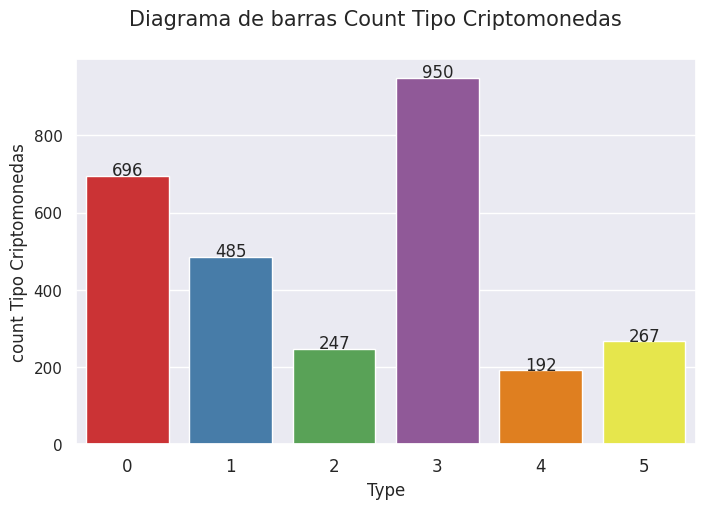

In [18]:
plot_bar(
    dta,
    paleta=None,
    ejeX='Type',
    ejey='count Tipo Criptomonedas',
    title='Count Tipo Criptomonedas')


# **Preprocessing**
---

Assigning the real data type

In [19]:
dta[[
    'p1_d', 'p2_d', 'p3_d',
    'duration', 'max_d', 'min_d',
    'Avg_bps', 'Avg_pps','Avg_bpp',
    'p1_ip', 'p2_ip', 'p3_ip',
    'p1_ib', 'p2_ib','p3_ib']] = dta[[
    'p1_d', 'p2_d', 'p3_d',
    'duration', 'max_d', 'min_d',
    'Avg_bps', 'Avg_pps','Avg_bpp',
    'p1_ip', 'p2_ip', 'p3_ip',
    'p1_ib', 'p2_ib','p3_ib']].astype('float64')

In [20]:
dta[[
    'Netflows', '#packets',
    '#Bytes', '#sp', '#dp']] = dta[[
    'Netflows', '#packets',
    '#Bytes', '#sp', '#dp']].astype('int64')

In [21]:
dta['First_Protocol'].unique()

array(['TCP', 'UDP'], dtype=object)

Categorization of the categorical variable

In [22]:
dta['First_Protocol'] = dta['First_Protocol'].replace({'TCP': 0, 'UDP':1})
dta.head(2)

,Netflows,First_Protocol,p1_d,p2_d,p3_d,duration,max_d,min_d,#packets,Avg_bps,...,first_dp,second_dp,third_dp,p1_ip,p2_ip,p3_ip,p1_ib,p2_ib,p3_ib,Type
0,65,0,18.93900,168.17300,194.28700,"7,845.12600",244.36200,0.00000,5546,"125,708.00000",...,443,80.0,123.0,3.00000,7.00000,22.00000,127.00000,255.00000,"1,888.00000",0
1,18,1,0.00000,0.00000,0.00000,0.08600,0.04400,0.00000,20,148.00000,...,443,53.0,53195.0,1.00000,1.00000,1.00000,37.00000,47.00000,64.00000,0


In [23]:
dta.columns

Index(['Netflows', 'First_Protocol', 'p1_d', 'p2_d', 'p3_d', 'duration',
       'max_d', 'min_d', '#packets', 'Avg_bps', 'Avg_pps', 'Avg_bpp', '#Bytes',
       '#sp', '#dp', 'first_sp', 'second_sp', 'third_sp', 'first_dp',
       'second_dp', 'third_dp', 'p1_ip', 'p2_ip', 'p3_ip', 'p1_ib', 'p2_ib',
       'p3_ib', 'Type'],
      dtype='object')

In [24]:
dta = dta.fillna(0)

In [25]:
dta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2837 entries, 0 to 2836
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Netflows        2837 non-null   int64  
 1   First_Protocol  2837 non-null   int64  
 2   p1_d            2837 non-null   float64
 3   p2_d            2837 non-null   float64
 4   p3_d            2837 non-null   float64
 5   duration        2837 non-null   float64
 6   max_d           2837 non-null   float64
 7   min_d           2837 non-null   float64
 8   #packets        2837 non-null   int64  
 9   Avg_bps         2837 non-null   float64
 10  Avg_pps         2837 non-null   float64
 11  Avg_bpp         2837 non-null   float64
 12  #Bytes          2837 non-null   int64  
 13  #sp             2837 non-null   int64  
 14  #dp             2837 non-null   int64  
 15  first_sp        2837 non-null   object 
 16  second_sp       2837 non-null   object 
 17  third_sp        2837 non-null   o

# **CLASIFICATION**
---

In [26]:
X = dta.drop(['Type'], axis=1)
y = dta.iloc[:, -1]

A list is created to determine which variables are categorical in the numerical data set.


In [27]:
X_train, _, y_train, _ = train_test_split(X, y, train_size=0.85, stratify=y, random_state=random_seed)

In [28]:
X_train.columns

Index(['Netflows', 'First_Protocol', 'p1_d', 'p2_d', 'p3_d', 'duration',
       'max_d', 'min_d', '#packets', 'Avg_bps', 'Avg_pps', 'Avg_bpp', '#Bytes',
       '#sp', '#dp', 'first_sp', 'second_sp', 'third_sp', 'first_dp',
       'second_dp', 'third_dp', 'p1_ip', 'p2_ip', 'p3_ip', 'p1_ib', 'p2_ib',
       'p3_ib'],
      dtype='object')



A list is created to determine which variables are categorical in the numerical data set.


In [29]:
categorica = [False for i in range(27)]
categorica[1] = True
categorica[15] = True
categorica[16] = True
categorica[17] = True
categorica[18] = True
categorica[19] = True
categorica[20] = True

Allow the MI (Mutual Information) algorithm to determine which variables can best explain the target variable.

In [30]:
score_mi = mutual_info_classif(X_train, y_train, discrete_features=categorica, random_state=random_seed)

In [35]:
d_scores_mi = dict(zip(X_train.columns.tolist(), score_mi.tolist()))
d_scores_mi = {k:v for k,v in sorted(d_scores_mi.items(), key=lambda item: item[1])}

In [36]:
scores_mi = list(d_scores_mi.values())
features_mi = list(d_scores_mi.keys())

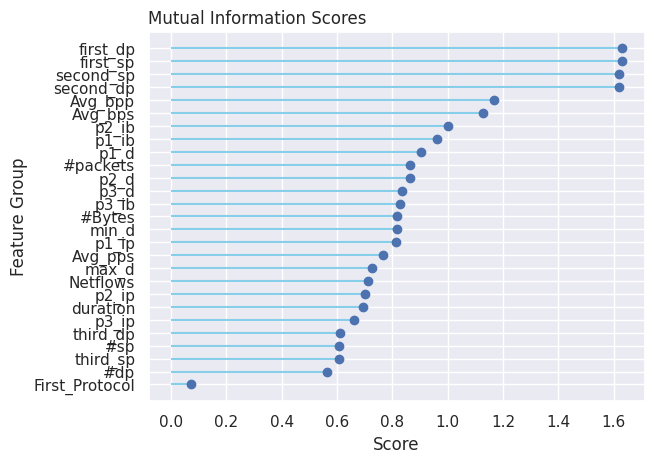

In [37]:
score_mi_plot(scores_mi,features_mi)

MI indicates that the variables that best explain the target variable are 'first_dp', 'first_sp', 'second_sp', 'second_dp', 'AVG_bpp', and 'Avg_bps'."

In [38]:
umbral = 1.0
feature_upper_umbral = [ i for i, j in d_scores_mi.items() if j >=umbral]
feature_upper_umbral

['Avg_bps', 'Avg_bpp', 'second_dp', 'second_sp', 'first_sp', 'first_dp']

The option of nearest neighbors is validated to check if a different result is obtained. A technique similar to code is used to determine the number that has the best stability in selecting the best variables.

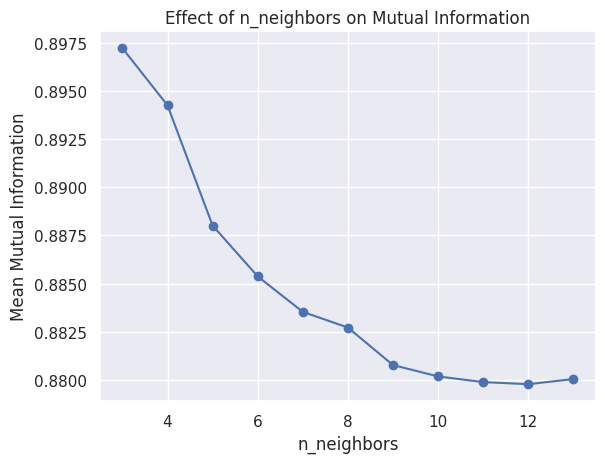

In [39]:
n_neighbors_values = list(range(3,14))
n_neighbors_values

scores = []
for n_neighbors in n_neighbors_values:
    mi = mutual_info_classif(
        X_train,
        y_train,
        discrete_features=categorica,
        n_neighbors=n_neighbors,
        random_state=random_seed)
    scores.append(np.mean(mi))

plt.plot(n_neighbors_values, scores, marker='o')
plt.xlabel('n_neighbors')
plt.ylabel('Mean Mutual Information')
plt.title('Effect of n_neighbors on Mutual Information')
plt.show()

In this case, the number 5 is used.

In [40]:
score_mi = mutual_info_classif(
    X_train,
    y_train,
    discrete_features=categorica,
    random_state=random_seed,
    n_neighbors=5)

In [41]:
d_scores_mi = dict(zip(X_train.columns.tolist(), score_mi.tolist()))
d_scores_mi = {k:v for k,v in sorted(d_scores_mi.items(), key=lambda item: item[1])}

scores_mi = list(d_scores_mi.values())
features_mi = list(d_scores_mi.keys())

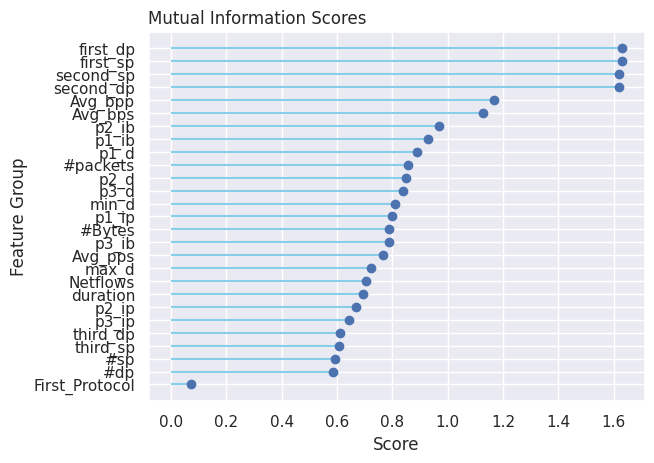

In [42]:
score_mi_plot(scores_mi,features_mi)

There is no significant change in the variables that have a score greater than 1. However, with respect to the remaining variables, there were minor changes.

# **REGRESSION**
---

For the regression problem, the variable 'duration' will be used as the target variable."

In [43]:
X = dta.drop(['duration'], axis=1)
X['Type'] = X['Type'].astype("float64")
y = dta['duration']

In [44]:
X_train, _, y_train, _ = train_test_split(X, y, train_size=0.85, random_state=random_seed)

In [45]:
X_train.columns.tolist().index('Type')

26



A list is created to determine which variables are categorical in the numerical data set.


In [ ]:
categorica = [False for i in range(27)]
categorica[1] = True
categorica[15] = True
categorica[16] = True
categorica[17] = True
categorica[18] = True
categorica[19] = True
categorica[20] = True

Allow the MI (Mutual Information) algorithm to determine which variables can best explain the target variable.

In [46]:
score_mi = mutual_info_regression(X_train, y_train, discrete_features=[1,15,16,17,18,19,20, -1], random_state=random_seed)

In [47]:
d_scores_mi = dict(zip(X_train.columns.tolist(), score_mi.tolist()))
d_scores_mi = {k:v for k,v in sorted(d_scores_mi.items(), key=lambda item: item[1])}

In [48]:
scores_mi = list(d_scores_mi.values())
features_mi = list(d_scores_mi.keys())

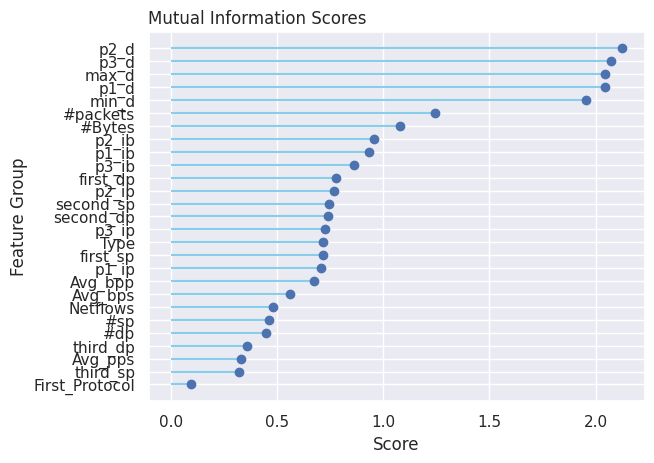

In [49]:
score_mi_plot(scores_mi,features_mi)

MI indicates that the variables that best explain the target variable are 'p2_d', 'p3_d', 'max_d', 'p1_d', 'min_d', '#packets' and '#Bytes'."

In [50]:
umbral = 1.0
feature_upper_umbral = [ i for i, j in d_scores_mi.items() if j >=umbral]
feature_upper_umbral

['#Bytes', '#packets', 'min_d', 'p1_d', 'max_d', 'p3_d', 'p2_d']




The option of nearest neighbors is validated to check if a different result is obtained. A technique similar to code is used to determine the number that has the best stability in selecting the best variables.

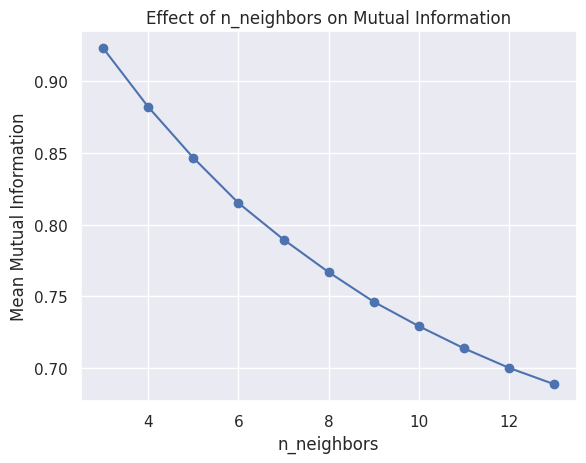

In [51]:
n_neighbors_values = list(range(3,14))
n_neighbors_values

scores = []
for n_neighbors in n_neighbors_values:
    mi = mutual_info_regression(
        X_train,
        y_train,
        discrete_features=categorica,
        n_neighbors=n_neighbors,
        random_state=random_seed)
    scores.append(np.mean(mi))

plt.plot(n_neighbors_values, scores, marker='o')
plt.xlabel('n_neighbors')
plt.ylabel('Mean Mutual Information')
plt.title('Effect of n_neighbors on Mutual Information')
plt.show()

In this case, the number 7 is used.

In [52]:
score_mi = mutual_info_regression(
    X_train,
    y_train,
    discrete_features=categorica,
    random_state=random_seed,
    n_neighbors=7)

In [53]:
d_scores_mi = dict(zip(X_train.columns.tolist(), score_mi.tolist()))
d_scores_mi = {k:v for k,v in sorted(d_scores_mi.items(), key=lambda item: item[1])}

scores_mi = list(d_scores_mi.values())
features_mi = list(d_scores_mi.keys())

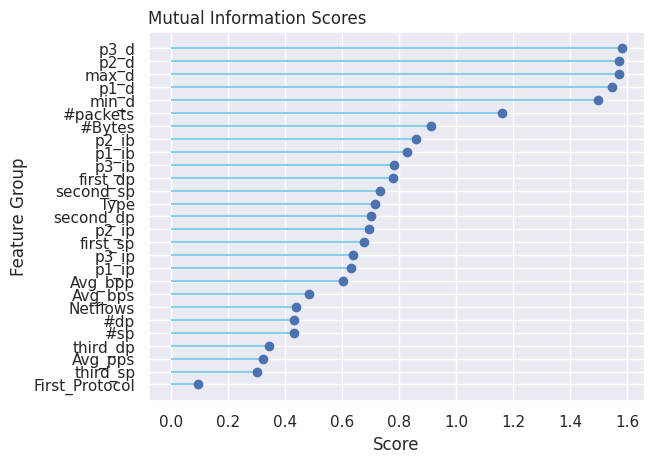

In [54]:
score_mi_plot(scores_mi,features_mi)

Except that now p3_d is the most explanatory variable and #bytes has fallen outside the threshold.

#**Info**
---
@By: **Steven Bernal**

@Nickname: **Kaiziferr**

@Git: https://github.com/Kaiziferr